In [ ]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_regression

In [ ]:
df = pd.read_csv('data/life_expectancy.csv')
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.rename(columns={'Life expectancy ' : 'Life expectancy', ' BMI ': 'BMI','Measles ':'Measles',
                   'under-five deaths ': 'under-five deaths', 'Diphtheria ':'Diphtheria',
                   ' HIV/AIDS': 'HIV/AIDS', ' thinness  1-19 years':'thinness  1-19 years',
                   ' thinness 5-9 years' : 'thinness 5-9 years'}, inplace=True);

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

In [ ]:
columns = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B','BMI','Polio',
           'Total expenditure','Diphtheria','GDP','Population','thinness  1-19 years','thinness 5-9 years',
           'Income composition of resources','Schooling']
for column in columns:
    df[column] = imputer.fit_transform(df[[column]])

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
numeric_columns = ['Life expectancy', 'Adult Mortality',
                   'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                   'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                   'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                   'thinness  1-19 years', 'thinness 5-9 years',
                   'Income composition of resources', 'Schooling']

In [ ]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in numeric_columns:
    plt.subplot(6,4,i)
    plt.boxplot(df[column], patch_artist=True)
    plt.title(column)
    i += 1

In [ ]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in numeric_columns:
    plt.subplot(6,4,i)
    plt.hist(df[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

In [ ]:
to_normelize = ['Adult Mortality',
                'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                'thinness  1-19 years', 'thinness 5-9 years',
                'Income composition of resources']

In [ ]:
#Assess distribution of features
def log_normelize(data):
    plt.figure(figsize=(20,30))
    i = 1
    for column in to_normelize:
        plt.subplot(6,4,i)
        data[column] = np.log1p(data[column])
        plt.hist(data[column])
        plt.title(column)
        i += 1
log_normelize(df)

In [ ]:
#Sorted heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().sort_values(by='Life expectancy').T[::-1],cmap='coolwarm',annot=True, fmt=".2f");

In [ ]:
def feature_extraction(data):
    #UNIVARIATE SELECTION
    # Feature Extraction with Univariate Statistical Tests (f_regression)
    # load data
    X = data[numeric_columns].drop('Life expectancy',axis=1)
    y = data['Life expectancy']
    names=pd.DataFrame(X.columns)
    model = SelectKBest(score_func=f_regression, k=4)
    results = model.fit(X, y)
    
    results_df=pd.DataFrame(results.scores_)
    #Concat and name columns
    scored=pd.concat([names,results_df], axis=1)
    scored.columns = ["Feature", "Score"]
    scored.sort_values(by=['Score'],ascending=False)
    final_columns = scored[scored.Score > 0]
    df_sol = final_columns.sort_values(by=['Score'],ascending=False)

    return df_sol
feature_extraction(df)

In [ ]:
df.drop('Country', axis=1, inplace=True)
df = pd.get_dummies(df)
df.to_csv('data/final_life_expec.csv')

In [ ]:
numeric_columns_2 = ['Life expectancy',
                     'Adult Mortality',
                     'infant deaths',
                     'Alcohol',
                     'percentage expenditure',
                     'Hepatitis B',
                     'Measles',
                     'BMI',
                     'under-five deaths',
                     'Polio',
                     'Status'] 

In [ ]:
numeric_columns_1 = ['Total expenditure',
                     'Diphtheria',
                     'HIV/AIDS',
                     'GDP',
                     'Population',
                     'thinness  1-19 years',
                     'thinness 5-9 years',
                     'Income composition of resources',
                     'Schooling',
                     'Status']

In [ ]:
features = df[numeric_columns_1]

In [ ]:
sns.pairplot(data=features, hue='Status',corner=True)

In [ ]:
sns.pairplot(data=df[numeric_columns_2], hue='Status',corner=True)

In [ ]:

import plotly.express as px
plt.figure(figsize=(10,8))
fig=px.histogram(df,x='Life expectancy',color='Status')
fig.show()

In [ ]:
plt.figure(figsize=(10,8))
fig=px.violin(df,x='Status',y='Life expectancy',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [ ]:
px.scatter_3d(df.sort_values(by='Year'),y='Schooling',x='HIV/AIDS',z='Life expectancy',
                                       template='plotly_dark',color='Status',size='Total expenditure')

In [ ]:
px.scatter(df.sort_values(by='Year'),y='Life expectancy',
                                     x='Schooling',
                                     animation_frame='Year',
                                     animation_group='Country',
                                     template='plotly_dark',
                                     color='Country',
                                     size='Life expectancy',
                                     title='Life expectancy versus Schooling of countries in every year')

### CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from reg_model import RegModel
import matplotlib.pyplot as plt


In [48]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import catboost as cb
import pickle
import pandas as pd

In [4]:
final_df = pd.read_csv('data/final_life_expec.csv')
final_df.drop('Unnamed: 0', axis=1, inplace=True)
final_df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,5.575949,4.143135,0.00995,4.280542,4.189655,7.051856,3.000720,4.430817,...,4.189655,0.09531,6.372055,17.334091,2.901422,2.906901,0.391366,10.1,0,1
1,2014,59.9,5.605802,4.174387,0.00995,4.311116,4.143135,6.200509,2.975530,4.465908,...,4.143135,0.09531,6.419501,12.699497,2.917771,2.917771,0.389336,10.0,0,1
2,2013,59.9,5.594711,4.204693,0.00995,4.307023,4.174387,6.066108,2.949688,4.499810,...,4.174387,0.09531,6.450067,17.272826,2.928524,2.928524,0.385262,9.9,0,1
3,2012,59.5,5.609472,4.248495,0.00995,4.371777,4.219508,7.933080,2.923162,4.543295,...,4.219508,0.09531,6.508708,15.123021,2.939162,2.944439,0.380489,9.8,0,1
4,2011,59.2,5.620401,4.276666,0.00995,2.091507,4.234107,8.011023,2.901422,4.584967,...,4.234107,0.09531,4.167242,14.906964,2.954910,2.954910,0.374318,9.5,0,1


For CatBoost we need to create the model in the old fashion way

In [45]:
numeric_columns = ['Life expectancy', 'Adult Mortality',
                   'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                   'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                   'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
                   'thinness  1-19 years', 'thinness 5-9 years',
                   'Income composition of resources', 'Schooling']

In [46]:
X = final_df[numeric_columns].drop('Life expectancy', axis=1)
y = final_df['Life expectancy']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

### Creating Regressors models

In [ ]:
def report_results(y_pred, y_train_pred):
    training_score = r2_score(y_train, y_train_pred)
    testing_score = r2_score(y_test, y_pred)
    print(f"training score: {training_score}")
    print(f"testing score= {testing_score}")
    print(f"Diff between train-test: {training_score-testing_score}")
    # Add the error as well later WIP
    return training_score, testing_score

In [ ]:
def save_model(model):
    # save the model to disk
    filename = f'models/{model.__class__.__name__}.sav'
    pickle.dump(model, open(filename, 'wb'))

In [ ]:
def load_pickle(model_name):
    # load the model from file
    path = f"models/{model_name}.sav"
    loaded_model = pickle.load(open(path, 'rb'))
    return loaded_model

In [ ]:
def residuale(y_pred_train, y_pred_test):
    #Plotting graphs
    fig, ax= plt.subplots(1,2,figsize=(10,4))
    ax[0].set_title("Residual Plot of Train samples")
    sns.distplot((y_train-y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    #Y_test VS. Y_train scatter plot
    ax[1].set_title('y_test VS. y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Running all Models

In [69]:
# Model configuration
params = {'lgb_reg': {
                      'boosting_type': ['gbdt'],  
                      'objective': ['regression'],
                      'learning_rate' : [0.01, 0.03],
                      'n_estimators' : [100, 500],
                      'max_depth' : [4,8],
                      'min_child_samples' : [10,20],
                      'min_child_weight' : [0.01,0.05],
            },
           'xgb_reg': {
                      'objective': ['reg:squarederror'],
                      'max_depth': [6],
                      'min_child_weight': [5],
                      'learning_rate': [0.2],
                      'subsample': [0.7],
                      'n_estimators': [100],
                      'n_jobs' : [-1],
            },
            'cat_reg': {
                      'loss_function': 'RMSE',
                      'task_type':'GPU',
                      'random_state':[10], 
                      'verbose': False
            }       
           }

models = {'xgb_reg': XGBRegressor,
          'lgb_reg': LGBMRegressor,
          'cat_reg': CatBoostRegressor}


1. XGBRegressor

In [6]:
# Initialize the model
xgb_model = RegModel(final_df, model=models['xgb_reg'])

Preparing the data
Running on a new model
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/XGBRegressor.sav
training score: 0.9990555792182263
testing score= 0.9602226390238977
Diff between train-test: 0.03883294019432859
Mean Absolute Error: 1.2275869538183926


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


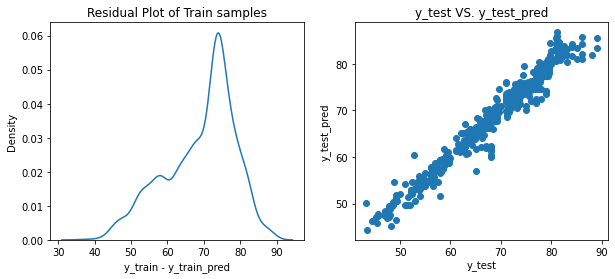

In [7]:
# Running on default model
xgb_train_score, xgb_test_score = xgb_model.fit_predict_score(final_df, show=1, opt=0, lpick=0, spick=1)

In [8]:
xgb_model.z_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>

In [9]:
xgb_model = RegModel(final_df, model=models['xgb_reg'], params=params['xgb_reg'])

Preparing the data
Running on a new model
Finding best params with GridSearch
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/XGBRegressor.sav
training score: 0.9961072635517922
testing score= 0.9617750858201692
Diff between train-test: 0.034332177731623004
Mean Absolute Error: 1.2280615178844148


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


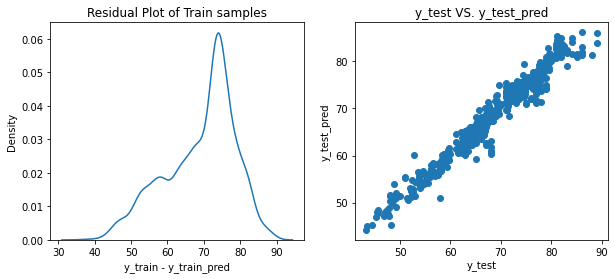

In [10]:
# Running with params tuning
xgb_train_score, xgb_test_score = xgb_model.fit_predict_score(final_df, show=1, opt=0, lpick=0, spick=1)
xgb_model.best_score = xgb_test_score

In [11]:
new_df = xgb_model.optimize_model()

Checking to drop: Population
Preparing the data
Done preprocessing procedures -> Fit & Predict
new_test_score: 0.9612188269713519 --- self.best_score: 0.9617750858201692
Abort deleting feature, optimization completed


No progress was achieved with features reduction \
So we will not continue to check further.

2. CatBoost

In [63]:

X=final_df.drop('Life expectancy', axis=1)
y=final_df['Life expectancy']

In [64]:
# Initialize the model
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [65]:
cat_reg = CatBoostRegressor(loss_function='RMSE',task_type='GPU',random_state=10, verbose=False)

In [66]:
grid = {'iterations': [200],
        'learning_rate': [0.1],
        'depth': [6],
        'l2_leaf_reg': [3]}
cat_reg.grid_search(grid, train_dataset)

bestTest = 2.351089019
bestIteration = 191
0:	loss: 2.3510890	best: 2.3510890 (0)	total: 2.41s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
bestTest = 2.394876697
bestIteration = 198
Training on fold [1/3]
bestTest = 2.46747114
bestIteration = 199
Training on fold [2/3]
bestTest = 2.373177592
bestIteration = 199


{'params': {'depth': 6,
  'l2_leaf_reg': 3,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [78]:
y_pred = cat_reg.predict(X_test)
y_train_pred = cat_reg.predict(X_train)

In [79]:
cat_test_score = r2_score(y_test, y_pred)
cat_train_score = r2_score(y_train, y_train_pred)
cat_test_score

0.955287187528308

**Question** \
What is the meaning of running the calss on cat model? \
The score is higher but is it valid? \
I didnt use the pool method in the class


In [72]:
cat_model = RegModel(final_df, model=models['cat_reg'])

Preparing the data
Running on a new model
Done preprocessing procedures -> Fit & Predict
Learning rate set to 0.046861
0:	learn: 9.2412547	total: 14.2ms	remaining: 14.2s
1:	learn: 8.8976070	total: 17.6ms	remaining: 8.79s
2:	learn: 8.5865126	total: 20ms	remaining: 6.64s
3:	learn: 8.2798663	total: 22.5ms	remaining: 5.61s
4:	learn: 7.9924130	total: 25.2ms	remaining: 5.02s
5:	learn: 7.7416969	total: 29.4ms	remaining: 4.88s
6:	learn: 7.4852713	total: 31.7ms	remaining: 4.49s
7:	learn: 7.2550961	total: 33.9ms	remaining: 4.21s
8:	learn: 7.0193963	total: 37.2ms	remaining: 4.09s
9:	learn: 6.7954810	total: 40.1ms	remaining: 3.97s
10:	learn: 6.5767145	total: 43.8ms	remaining: 3.94s
11:	learn: 6.3623727	total: 47.6ms	remaining: 3.92s
12:	learn: 6.1717347	total: 50.5ms	remaining: 3.83s
13:	learn: 5.9939067	total: 53.7ms	remaining: 3.78s
14:	learn: 5.8155610	total: 56.8ms	remaining: 3.73s
15:	learn: 5.6524427	total: 60.5ms	remaining: 3.72s
16:	learn: 5.4933723	total: 63.3ms	remaining: 3.66s
17:	learn

c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


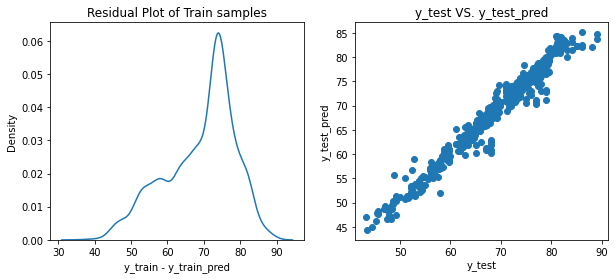

(0.9923589880492985, 0.9654400856237667)

In [73]:
cat_model.fit_predict_score(final_df, show=1, opt=0, lpick=0, spick=1)

7. LightLGBM

In [74]:
# Initialize the model
lgb_model = RegModel(final_df, model=models['lgb_reg'])

Preparing the data
Running on a new model
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/LGBMRegressor.sav
training score: 0.9909216952650579
testing score= 0.9625553514696862
Diff between train-test: 0.02836634379537173
Mean Absolute Error: 1.2023638923495112


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


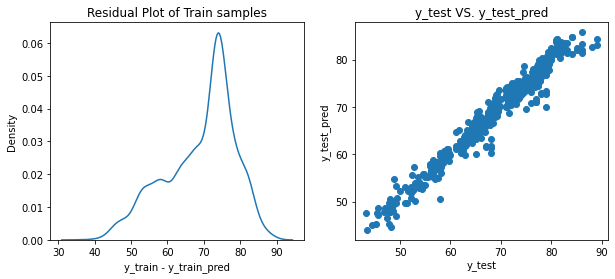

In [75]:
# Running on default model
lgb_train_score, lgb_test_score = lgb_model.fit_predict_score(final_df, show=1, opt=0, lpick=0, spick=1)

In [76]:
lgb_model = RegModel(final_df, model=models['lgb_reg'], params=params['lgb_reg'])

Preparing the data
Running on a new model
Finding best params with GridSearch
Done preprocessing procedures -> Fit & Predict
Saving new model to file: models/LGBMRegressor.sav
training score: 0.9950617392099035
testing score= 0.9661394294890712
Diff between train-test: 0.028922309720832318
Mean Absolute Error: 1.1108828465337597


c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


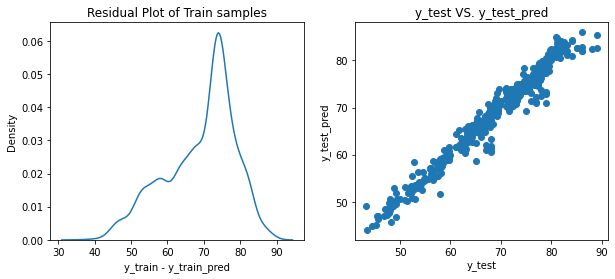

In [77]:
# Running with params tuning
lgb_train_score, lgb_test_score = lgb_model.fit_predict_score(final_df, show=1, opt=0, lpick=0, spick=1)
lgb_model.best_score = lgb_test_score

**Conclusion**

In [80]:
results = {
    'xgb': {'r_train': xgb_train_score, 'r_test': xgb_test_score},
    'cat': {'r_train': cat_train_score, 'r_test': cat_test_score},
    'lgb': {'r_train': lgb_train_score, 'r_test': lgb_test_score}
}

In [81]:
score_df = pd.DataFrame.from_dict(results, orient='index', columns=['r_train', 'r_test'])
score_df.head(10)

,r_train,r_test
xgb,0.996107,0.961775
cat,0.980769,0.955287
lgb,0.995062,0.966139


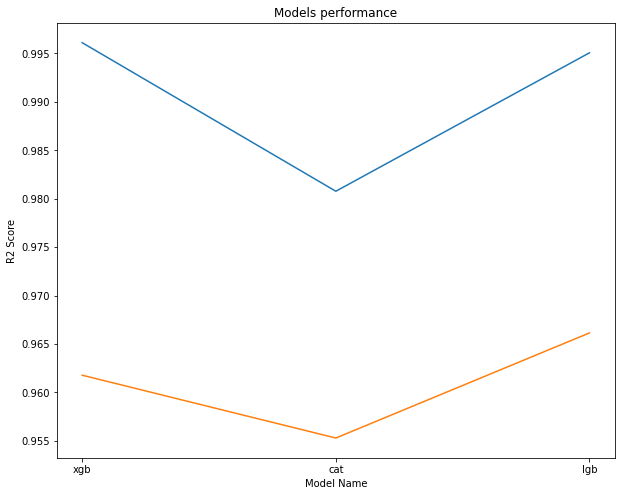

In [84]:
plt.figure(figsize=(10,8))
plt.plot(score_df)
plt.title('Models performance')
plt.xlabel('Model Name')
plt.ylabel('R2 Score');